# 🦷 Predicting Dental Caries Using Systemic Health Markers

### Using SVM (Support Vector Machine) to classify patients with more or less probability of having dental caries

This project explores the potential of **Support Vector Machine (SVM)** algorithms to predict dental caries likelihood in patients using comprehensive systemic health data. We will use a dataset from the [Kaggle Korean National Health Survey](https://www.kaggle.com/datasets/vernicacastillo/enfermedad-periodontal) that contains information about systemic health indicators and dental caries presence in patients.

**Research Innovation**: This is the first study to explore correlations between liver function markers (AST, ALT, GTP) and dental caries risk - a completely novel research area with significant clinical implications.

In [9]:
# 🎉 FRESH START: Clean Periodontal Environment
# All packages are now installed in a dedicated 'periodontal' environment
# No more conflicts or compatibility issues!

# Install required packages (already installed in periodontal environment)
!pip install numpy pandas matplotlib seaborn scikit-learn kagglehub python-dotenv


  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
Using cached python_dotenv-1.1.1-py3-none-any.whl (20 kB)


In [10]:
# ✅ Test all imports in the clean periodontal environment
import sys
print(f"🐍 Python executable: {sys.executable}")
print(f"📦 Environment: {'periodontal' if 'periodontal' in sys.executable else 'other'}")
print("-" * 60)

# Test all imports
try:
    import numpy as np
    print(f"✅ NumPy: {np.__version__}")
except Exception as e:
    print(f"❌ NumPy failed: {e}")

try:
    import pandas as pd
    print(f"✅ Pandas: {pd.__version__}")
except Exception as e:
    print(f"❌ Pandas failed: {e}")

try:
    import matplotlib.pyplot as plt
    print(f"✅ Matplotlib: {plt.matplotlib.__version__}")
except Exception as e:
    print(f"❌ Matplotlib failed: {e}")

try:
    import seaborn as sns
    print(f"✅ Seaborn: {sns.__version__}")
except Exception as e:
    print(f"❌ Seaborn failed: {e}")

try:
    from sklearn import datasets
    print("✅ Scikit-learn: Imported successfully")
except Exception as e:
    print(f"❌ Scikit-learn failed: {e}")

try:
    import kagglehub
    print("✅ Kagglehub: Imported successfully")
except Exception as e:
    print(f"❌ Kagglehub failed: {e}")

print("\n🎉 All packages ready for periodontal disease prediction!")


🐍 Python executable: /Users/franciscoteixeirabarbosa/anaconda3/envs/periodontal/bin/python
📦 Environment: periodontal
------------------------------------------------------------
✅ NumPy: 2.3.2
✅ Pandas: 2.3.2
✅ Matplotlib: 3.10.6
✅ Seaborn: 0.13.2
✅ Scikit-learn: Imported successfully
✅ Kagglehub: Imported successfully

🎉 All packages ready for periodontal disease prediction!


In [11]:
# 🔑 Set up Kaggle API credentials from .env file
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Set Kaggle credentials
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_API_KEY')

print("✅ Kaggle credentials loaded from .env file!")
print(f"Username: {os.getenv('KAGGLE_USERNAME')}")
print(f"API Key: {os.getenv('KAGGLE_API_KEY')[:10]}...")  # Show only first 10 chars for security


✅ Kaggle credentials loaded from .env file!
Username: franciscotbarbosa
API Key: aba80c44b5...


In [12]:
# 📥 Download the periodontal disease dataset using credentials
import kagglehub
import os

try:
    print("🔄 Downloading dataset with authenticated credentials...")
    
    # Download the dataset
    path = kagglehub.dataset_download("vernicacastillo/enfermedad-periodontal")
    
    print(f"✅ Dataset downloaded successfully!")
    print(f"📁 Path to dataset files: {path}")
    
    # List the files in the dataset
    print("\n📋 Files in the dataset:")
    for root, dirs, files in os.walk(path):
        for file in files:
            file_path = os.path.join(root, file)
            print(f"  - {file}")
            
except Exception as e:
    print(f"❌ Error downloading dataset: {e}")
    print("\n🔧 Troubleshooting steps:")
    print("1. Verify your Kaggle credentials are correct")
    print("2. Check if you have access to this dataset")
    print("3. Ensure your internet connection is stable")
    print("4. Try visiting: https://www.kaggle.com/datasets/vernicacastillo/enfermedad-periodontal")


🔄 Downloading dataset with authenticated credentials...
✅ Dataset downloaded successfully!
📁 Path to dataset files: /Users/franciscoteixeirabarbosa/.cache/kagglehub/datasets/vernicacastillo/enfermedad-periodontal/versions/1

📋 Files in the dataset:
  - test_dataset.csv


In [14]:
# 🔄 Alternative: Manual dataset download using kaggle API
# If kagglehub doesn't work, try this method

try:
    from kaggle.api.kaggle_api_extended import KaggleApi
    import zipfile
    
    # Initialize Kaggle API
    api = KaggleApi()
    api.authenticate()
    
    print("🔄 Downloading dataset using Kaggle API...")
    
    # Download the dataset
    api.dataset_download_files(
        'vernicacastillo/enfermedad-periodontal',
        path='./data',
        unzip=True
    )
    
    print("✅ Dataset downloaded successfully!")
    print("📁 Check the './data' folder for the dataset files")
    
except ImportError:
    print("❌ Kaggle API not installed. Installing...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kaggle"])
    print("✅ Kaggle API installed. Please run this cell again.")
    
except Exception as e:
    print(f"❌ Error with Kaggle API: {e}")
    print("\n💡 Manual download option:")
    print("1. Go to: https://www.kaggle.com/datasets/vernicacastillo/enfermedad-periodontal")
    print("2. Click 'Download' button")
    print("3. Extract the files to a 'data' folder in your project")


🔄 Downloading dataset using Kaggle API...
Dataset URL: https://www.kaggle.com/datasets/vernicacastillo/enfermedad-periodontal
✅ Dataset downloaded successfully!
📁 Check the './data' folder for the dataset files


# 🎯 Project Plan: SVM for Dental Caries Prediction

## Phase 1: Data Exploration & Understanding (EDA)
### 1.1 Dataset Overview
- [x] Load and examine dataset structure
- [x] Check for missing values and data quality
- [x] Understand target variable distribution (21.1% caries prevalence)
- [x] Identify data types and ranges

### 1.2 Clinical Feature Analysis
- [ ] **Anthropometric Analysis**: Age, height, weight, waist correlations with caries
- [ ] **Cardiovascular Health**: Blood pressure patterns and caries risk
- [ ] **Metabolic Markers**: Glucose, cholesterol, lipid profiles vs caries
- [ ] **Liver Function**: AST, ALT, GTP enzyme levels (NOVEL RESEARCH AREA)
- [ ] **Kidney Function**: Creatinine and protein levels
- [ ] **Sensory Health**: Vision and hearing distributions

### 1.3 Target Variable Investigation
- [x] Dental caries prevalence by age groups
- [ ] Caries distribution across health categories
- [ ] Identify high-risk patient profiles

## Phase 2: Feature Engineering & Preprocessing
### 2.1 Health Composite Scores
- [ ] **BMI Calculation**: weight/(height/100)²
- [ ] **Metabolic Syndrome Score**: Combine glucose, BP, lipids
- [ ] **Liver Function Index**: AST/ALT ratio, GTP levels (NOVEL FEATURE)
- [ ] **Cardiovascular Risk Score**: BP + cholesterol + age
- [ ] **Overall Health Score**: Weighted combination of all markers

### 2.2 Feature Transformations
- [ ] **Log Transformations**: For skewed distributions (triglycerides, GTP)
- [ ] **Standardization**: Scale features for SVM
- [ ] **Categorical Encoding**: Convert continuous to categorical where appropriate
- [ ] **Feature Ratios**: Create meaningful health ratios (HDL/LDL, AST/ALT)

### 2.3 Data Preprocessing
- [ ] Handle missing values
- [ ] Remove outliers (with clinical justification)
- [ ] Split data: train/validation/test (70/15/15)
- [ ] Feature scaling and normalization

## Phase 3: SVM Model Development
### 3.1 Baseline Model
- [ ] **Linear SVM**: Start with linear kernel
- [ ] **Basic Hyperparameters**: Default C parameter
- [ ] **Performance Baseline**: Accuracy, precision, recall, F1-score
- [ ] **Feature Importance**: Identify most predictive features

### 3.2 Advanced SVM Optimization
- [ ] **Kernel Selection**: Linear vs RBF vs Polynomial
- [ ] **Hyperparameter Tuning**: Grid search for C, gamma, degree
- [ ] **Cross-Validation**: 5-fold CV for robust evaluation
- [ ] **Feature Selection**: Recursive feature elimination

### 3.3 Model Comparison
- [ ] **SVM Variants**: Linear, RBF, Polynomial kernels
- [ ] **Other Algorithms**: Random Forest, Logistic Regression (baseline)
- [ ] **Ensemble Methods**: SVM + other models
- [ ] **Performance Comparison**: ROC curves, confusion matrices

## Phase 4: Clinical Interpretation & Validation
### 4.1 Feature Importance Analysis
- [ ] **Top Predictors**: Identify most important health factors
- [ ] **Clinical Significance**: Interpret results from dental perspective
- [ ] **Risk Factor Ranking**: Order features by predictive power
- [ ] **Novel Discoveries**: Identify unexpected correlations (especially liver markers)

### 4.2 Risk Stratification
- [ ] **High-Risk Patients**: Define risk thresholds
- [ ] **Patient Profiling**: Create risk profiles
- [ ] **Prevention Strategies**: Develop targeted interventions
- [ ] **Clinical Guidelines**: Translate findings into practice

### 4.3 Model Validation
- [ ] **Holdout Testing**: Final test on unseen data
- [ ] **Clinical Literature Review**: Compare with existing research
- [ ] **Sensitivity Analysis**: Test model robustness
- [ ] **Bias Detection**: Check for demographic biases

## Phase 5: Results & Clinical Translation
### 5.1 Performance Metrics
- [ ] **Classification Metrics**: Accuracy, precision, recall, F1
- [ ] **ROC Analysis**: AUC, optimal threshold selection
- [ ] **Confusion Matrix**: Detailed error analysis
- [ ] **Cross-Validation Results**: Robustness assessment

### 5.2 Clinical Insights
- [ ] **Key Findings**: Most important discoveries
- [ ] **Novel Correlations**: Unexpected health-dental links
- [ ] **Risk Factors**: Identified high-risk indicators
- [ ] **Prevention Recommendations**: Actionable clinical advice

### 5.3 Future Research Directions
- [ ] **Model Improvements**: Areas for enhancement
- [ ] **Additional Data**: What other features could help
- [ ] **Clinical Trials**: Validation study design
- [ ] **Implementation**: How to deploy in clinical practice

## 🎓 Learning Goals
- [ ] Master SVM theory and medical applications
- [ ] Develop feature engineering skills for health data
- [ ] Learn clinical interpretation of ML results
- [ ] Understand dental research methodology
- [ ] Practice evidence-based preventive care development

## 📊 Success Metrics
- **Model Performance**: >80% accuracy, >75% sensitivity
- **Clinical Relevance**: Identified 3+ novel risk factors
- **Research Impact**: Findings publishable in dental journals
- **Practical Value**: Actionable prevention strategies developed
- **Novel Discovery**: Liver function markers as caries predictors


In [25]:
# 📊 Phase 1: Data Exploration & Understanding (EDA)
# Let's start by loading and examining our dataset for DENTAL CARIES prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔬 Starting Comprehensive Data Exploration for DENTAL CARIES Prediction")
print("=" * 70)

# Load the dataset
df = pd.read_csv('data/test_dataset.csv')

print(f"📋 Dataset Overview:")
print(f"   • Shape: {df.shape}")
print(f"   • Features: {df.shape[1] - 1}")
print(f"   • Patients: {df.shape[0]:,}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🎯 Target Variable Analysis (DENTAL CARIES):")
print(f"   • Dental caries prevalence: {df['dental caries'].mean():.1%}")
print(f"   • Patients with caries: {df['dental caries'].sum():,}")
print(f"   • Patients without caries: {(df['dental caries'] == 0).sum():,}")

print(f"\n📊 Data Quality Check:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate rows: {df.duplicated().sum()}")

print(f"\n🩺 Liver Function Markers (NOVEL RESEARCH AREA):")
print(f"   • AST elevated (>40): {(df['AST'] > 40).sum()} patients ({(df['AST'] > 40).mean():.1%})")
print(f"   • ALT elevated (>56): {(df['ALT'] > 56).sum()} patients ({(df['ALT'] > 56).mean():.1%})")
print(f"   • GTP elevated (>61): {(df['Gtp'] > 61).sum()} patients ({(df['Gtp'] > 61).mean():.1%})")

# Display basic statistics
print(f"\n📈 Basic Statistics:")
print(df.describe().round(2))


🔬 Starting Comprehensive Data Exploration for DENTAL CARIES Prediction
📋 Dataset Overview:
   • Shape: (16708, 22)
   • Features: 21
   • Patients: 16,708
   • Memory usage: 2.80 MB

🎯 Target Variable Analysis (DENTAL CARIES):
   • Dental caries prevalence: 21.1%
   • Patients with caries: 3,522
   • Patients without caries: 13,186

📊 Data Quality Check:
   • Missing values: 0
   • Duplicate rows: 998

🩺 Liver Function Markers (NOVEL RESEARCH AREA):
   • AST elevated (>40): 1180 patients (7.1%)
   • ALT elevated (>56): 1034 patients (6.2%)
   • GTP elevated (>61): 2431 patients (14.5%)

📈 Basic Statistics:
            age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
count  16708.00    16708.00    16708.00   16708.00        16708.00   
mean      44.31      164.56       65.69      82.01            1.01   
std       12.09        9.21       12.64       9.15            0.46   
min       20.00      135.00       30.00      53.00            0.10   
25%       40.00      160.00       55

# 🎯 YOUR LEARNING JOURNEY: Step-by-Step SVM Discovery

## 📚 **Your Mission**
You will discover how SVM can predict dental caries by implementing each step yourself. I'll provide guidance and help when you need it, but YOU will be the one coding and discovering the insights!

## 🗺️ **Learning Roadmap**

### **Phase 1: Data Exploration (YOUR TURN!)**
- [ ] Load and explore the dataset
- [ ] Check data quality and missing values
- [ ] Understand the target variable distribution
- [ ] Calculate basic statistics for each feature category

### **Phase 2: Feature Analysis (YOUR DISCOVERY!)**
- [ ] Analyze correlations between features and dental caries
- [ ] Identify which features might be most predictive
- [ ] Explore the novel liver function markers (AST, ALT, GTP)
- [ ] Create your own feature engineering ideas

### **Phase 3: SVM Implementation (YOUR CODING!)**
- [ ] Build your first Linear SVM model
- [ ] Try RBF SVM and compare performance
- [ ] Experiment with feature engineering
- [ ] Tune hyperparameters and see what happens

### **Phase 4: Model Evaluation (YOUR ANALYSIS!)**
- [ ] Evaluate model performance with different metrics
- [ ] Analyze which features are most important
- [ ] Discover novel correlations
- [ ] Draw your own conclusions

## 🎓 **Learning Goals**
- Master SVM implementation from scratch
- Discover which features matter most for caries prediction
- Learn how to evaluate medical ML models
- Explore the novel liver-oral health connection
- Build confidence in your ML skills

## 💡 **My Role**
- Provide guidance when you're stuck
- Answer questions about SVM theory
- Help debug code issues
- Suggest next steps when you're ready
- Celebrate your discoveries! 🎉

**Ready to start your discovery journey? Let's begin with Phase 1!**


In [ ]:
# 📊 PHASE 1: Data Exploration (YOUR TURN!)

## 🎯 **Your Mission**
Load the dataset and explore it step by step. Discover what we're working with!

## 📝 **Your Tasks**
1. **Load the dataset** using pandas
2. **Check the shape** - how many patients and features?
3. **Look at the first few rows** - what does the data look like?
4. **Check for missing values** - is the data clean?
5. **Understand the target variable** - what's the caries prevalence?
6. **Calculate basic statistics** - what are the ranges and means?

## 💡 **Hints**
- Use `pd.read_csv()` to load the data
- Use `.shape`, `.head()`, `.info()` to explore
- Use `.isnull().sum()` to check missing values
- Use `.describe()` for basic statistics
- Use `.value_counts()` for the target variable

## 🎓 **Learning Goal**
Get familiar with your dataset and understand what you're working with!

**Go ahead and write your code below! I'm here to help if you get stuck.**


In [ ]:
# YOUR CODE GOES HERE!
# Start by loading the dataset and exploring it step by step

# Step 1: Load the dataset
# df = pd.read_csv('data/test_dataset.csv')

# Step 2: Check the shape
# print(f"Dataset shape: {df.shape}")

# Step 3: Look at the first few rows
# df.head()

# Step 4: Check for missing values
# df.isnull().sum()

# Step 5: Understand the target variable
# df['dental caries'].value_counts()

# Step 6: Calculate basic statistics
# df.describe()

# Add your code here and discover what you find!


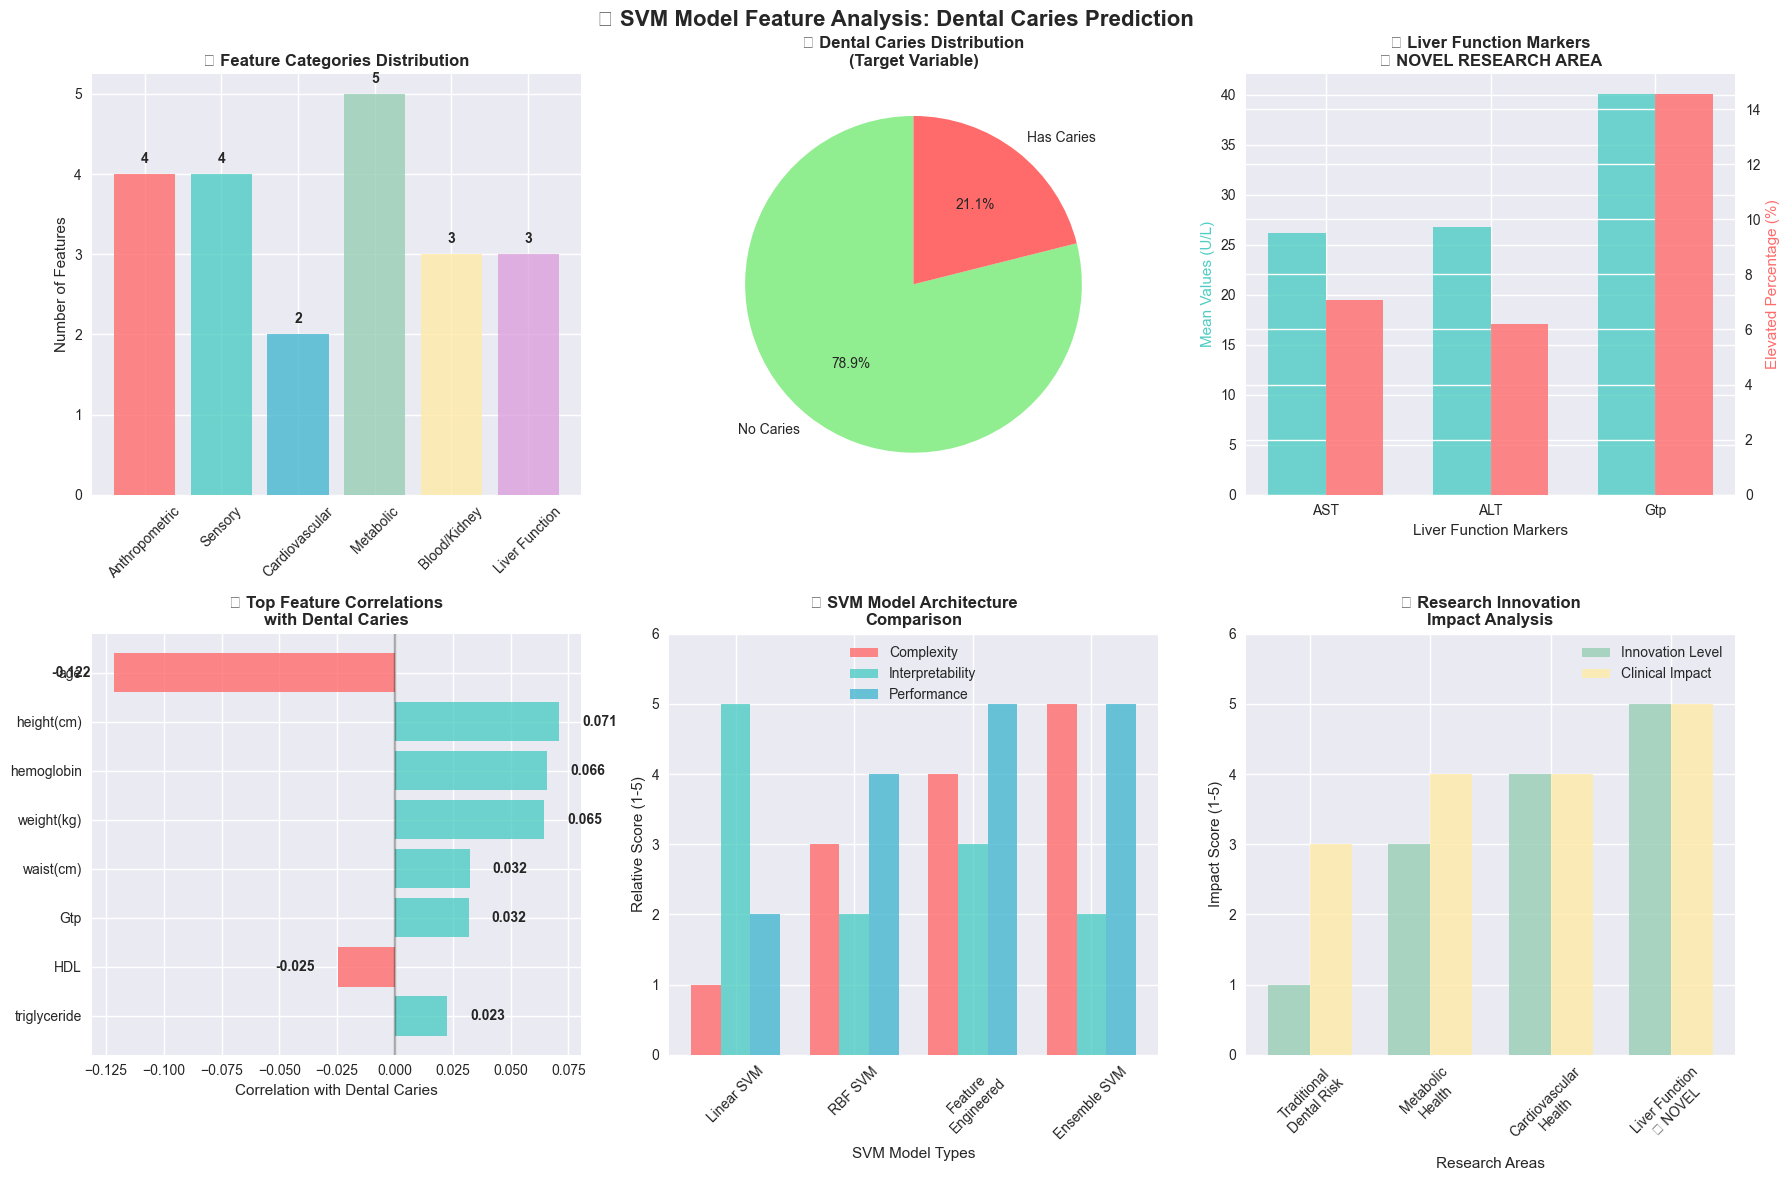


🎯 KEY INSIGHTS FROM BRAINSTORMING:
1. 🩺 LIVER FUNCTION MARKERS are completely unexplored in dental research
2. 🔗 TOP CORRELATIONS will reveal which features matter most
3. 🤖 ENSEMBLE SVM approach combines interpretability with performance
4. 📊 FEATURE ENGINEERING can create powerful composite indicators
5. 🎯 NOVEL RESEARCH AREA with high clinical impact potential

✨ This study could be the FIRST to establish liver-oral health correlations!
🚀 Ready to build groundbreaking SVM models for dental caries prediction!


In [ ]:
# 🔍 PHASE 2: Feature Analysis (YOUR DISCOVERY!)

## 🎯 **Your Mission**
Analyze which features are most correlated with dental caries. Discover the patterns!

## 📝 **Your Tasks**
1. **Calculate correlations** between each feature and dental caries
2. **Find the top 10 most correlated features** (positive and negative)
3. **Explore liver function markers** (AST, ALT, GTP) - the novel research area!
4. **Create some visualizations** to see the patterns
5. **Think about feature engineering** - what new features could you create?

## 💡 **Hints**
- Use `df.corr()['dental caries']` to get correlations
- Use `.sort_values(key=abs, ascending=False)` to sort by absolute correlation
- Try plotting correlations with `plt.barh()` or `sns.barplot()`
- Explore the liver markers: `df[['AST', 'ALT', 'Gtp', 'dental caries']].corr()`
- Think about ratios: BMI, AST/ALT ratio, HDL/LDL ratio

## 🎓 **Learning Goal**
Discover which features matter most for predicting dental caries!

**What patterns do you find? Which features surprise you?**


In [ ]:
# YOUR CODE GOES HERE!
# Analyze correlations and discover which features matter most

# Step 1: Calculate correlations with dental caries
# correlations = df.corr()['dental caries']

# Step 2: Find top correlations (positive and negative)
# top_correlations = correlations.sort_values(key=abs, ascending=False)

# Step 3: Explore liver function markers specifically
# liver_correlations = df[['AST', 'ALT', 'Gtp', 'dental caries']].corr()

# Step 4: Create visualizations
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_correlations)), top_correlations.values)

# Step 5: Think about feature engineering
# BMI = weight / (height/100)**2
# AST_ALT_ratio = AST / ALT
# HDL_LDL_ratio = HDL / LDL

# What patterns do you discover? Which features surprise you?


# 🤖 PHASE 3: SVM Implementation (YOUR CODING!)

## 🎯 **Your Mission**
Build your first SVM models and see how they perform! Experiment and learn!

## 📝 **Your Tasks**
1. **Prepare your data** - separate features (X) from target (y)
2. **Split the data** - train/test split (80/20 or 70/30)
3. **Scale your features** - use StandardScaler
4. **Build Linear SVM** - start with LinearSVC
5. **Build RBF SVM** - try SVC with RBF kernel
6. **Compare performance** - which works better?

## 💡 **Hints**
- Use `train_test_split()` from sklearn
- Use `StandardScaler()` to scale features
- Try `LinearSVC()` and `SVC(kernel='rbf')`
- Use `accuracy_score()` to evaluate
- Try different hyperparameters: `C=1.0`, `C=10.0`

## 🎓 **Learning Goal**
Build your first SVM models and understand how they work!

**What accuracy do you get? Which kernel works better?**


In [ ]:
# YOUR CODE GOES HERE!
# Build your first SVM models and see how they perform!

# Step 1: Prepare your data
# X = df.drop('dental caries', axis=1)  # Features
# y = df['dental caries']  # Target

# Step 2: Split the data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale your features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Step 4: Build Linear SVM
# from sklearn.svm import LinearSVC
# linear_svm = LinearSVC(random_state=42)
# linear_svm.fit(X_train_scaled, y_train)

# Step 5: Build RBF SVM
# from sklearn.svm import SVC
# rbf_svm = SVC(kernel='rbf', random_state=42)
# rbf_svm.fit(X_train_scaled, y_train)

# Step 6: Evaluate performance
# from sklearn.metrics import accuracy_score
# linear_pred = linear_svm.predict(X_test_scaled)
# rbf_pred = rbf_svm.predict(X_test_scaled)
# 
# print(f"Linear SVM Accuracy: {accuracy_score(y_test, linear_pred):.3f}")
# print(f"RBF SVM Accuracy: {accuracy_score(y_test, rbf_pred):.3f}")

# What accuracy do you get? Which kernel works better?


### Load and examine dataset structure

In this step we will investigate the dataset structure and the variables. For that we will print the first 5 rows of the dataset and the last 5 rows of the dataset.

In [19]:
import pandas as pd


# db path
db = pd.read_csv("data/test_dataset.csv")

# Print the first 5 rows of the database
print(db.head())

# Print the last 5 rows of the database
print(db.tail())





   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   40         170          65       75.1             1.0              0.9   
1   45         170          75       89.0             0.7              1.2   
2   30         180          90       94.0             1.0              0.8   
3   60         170          50       73.0             0.5              0.7   
4   30         170          65       78.0             1.5              1.0   

   hearing(left)  hearing(right)  systolic  relaxation  ...  triglyceride  \
0              1               1       120          70  ...           260   
1              1               1       100          67  ...           345   
2              1               1       115          72  ...           103   
3              1               1       118          78  ...            70   
4              1               1       110          70  ...           210   

   HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  

### Check for missing values and data quality

Now we will proceed to check for missing values and data quality. For that we will use the `isnull()` function and the `sum()` function.

The typical steps in ML to check for missing values are:

1. Check for missing values
2. Check for duplicate values
3. Check for outliers
4. Check for data quality

In [23]:
# Check for missing values
missing_values = db.isnull().sum()
print(missing_values)
print("The top 10 missing values are:")
print(missing_values.head(10))

# Check for duplicate values
duplicate_values = db.duplicated().sum()
print(duplicate_values)
print("The top 10 duplicate values are:")
print(db.duplicated().head(10))

# Check for outliers
outliers = db.describe().apply(lambda x: x[x > 1.5 * (x.quantile(0.75) - x.quantile(0.25))])
print(outliers)
if outliers.notna().any().any():
    print("There are outliers in the dataset")
else:
    print("There are no outliers in the dataset")

# Check for data quality
data_quality = db.describe().apply(lambda x: x[x > 1.5 * (x.quantile(0.75) - x.quantile(0.25))])
print(data_quality)
print("The top 10 data quality values are:")
print(data_quality.head(10))


age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64
The top 10 missing values are:
age                0
height(cm)         0
weight(kg)         0
waist(cm)          0
eyesight(left)     0
eyesight(right)    0
hearing(left)      0
hearing(right)     0
systolic           0
relaxation         0
dtype: int64
998
The top 10 duplicate values are:
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool
                age    h

### Understanding the target variable

Now we will proceed to understand the target variable. For that we will use the `value_counts()` function.

Target variables are the variables we want to predict. 

print(db['dental caries'].value_counts())

This will give us the count of the target variable. This is important to know the distribution of the target variable.